<a href="https://colab.research.google.com/github/Balajinanda/Datascience-Project/blob/main/Data_Science_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

# Mount Google Drive to access files
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import zipfile
import os

# Define the path to the uploaded zip file and extraction directory
zip_file_path = '/content/drive/MyDrive/HAR Balaji/PAMAP2_Dataset.zip'
extract_dir = '/content/drive/MyDrive/HAR Balaji/PAMAP2_Dataset'

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# List the extracted files
extracted_files = os.listdir(extract_dir)
extracted_files

['subjectInformation.pdf',
 'DataCollectionProtocol.pdf',
 'readme.pdf',
 'PerformedActivitiesSummary.pdf',
 'DescriptionOfActivities.pdf',
 'Protocol',
 'Optional',
 'PAMAP2_Dataset']

In [3]:
# List the contents of the extracted directory to explore its structure
opportunity_dataset_path = os.path.join(extract_dir, 'PAMAP2_Dataset')
dataset_contents = os.listdir(opportunity_dataset_path)
dataset_contents

['Protocol',
 'Optional',
 'PerformedActivitiesSummary.pdf',
 'DescriptionOfActivities.pdf',
 'DataCollectionProtocol.pdf',
 'subjectInformation.pdf',
 'readme.pdf']

In [4]:
# List the contents of the 'dataset' folder
dataset_folder_path = os.path.join(opportunity_dataset_path, 'Protocol')
dataset_files = os.listdir(dataset_folder_path)
dataset_files

['subject101.dat',
 'subject102.dat',
 'subject103.dat',
 'subject104.dat',
 'subject105.dat',
 'subject106.dat',
 'subject107.dat',
 'subject108.dat',
 'subject109.dat']

In [5]:
import pandas as pd
import numpy as np

# Define the path to the .dat file (update the file path)
file_path = '/content/drive/MyDrive/HAR Balaji/PAMAP2_Dataset/Protocol/subject101.dat'

# Define column names based on the dataset documentation
columns = [
    "timestamp", "activity_id", "heart_rate",
    # IMU Hand
    "hand_temp", "hand_acc1_x", "hand_acc1_y", "hand_acc1_z",
    "hand_acc2_x", "hand_acc2_y", "hand_acc2_z",
    "hand_gyro_x", "hand_gyro_y", "hand_gyro_z",
    "hand_mag_x", "hand_mag_y", "hand_mag_z",
    "hand_orientation_1", "hand_orientation_2", "hand_orientation_3", "hand_orientation_4",
    # IMU Chest
    "chest_temp", "chest_acc1_x", "chest_acc1_y", "chest_acc1_z",
    "chest_acc2_x", "chest_acc2_y", "chest_acc2_z",
    "chest_gyro_x", "chest_gyro_y", "chest_gyro_z",
    "chest_mag_x", "chest_mag_y", "chest_mag_z",
    "chest_orientation_1", "chest_orientation_2", "chest_orientation_3", "chest_orientation_4",
    # IMU Ankle
    "ankle_temp", "ankle_acc1_x", "ankle_acc1_y", "ankle_acc1_z",
    "ankle_acc2_x", "ankle_acc2_y", "ankle_acc2_z",
    "ankle_gyro_x", "ankle_gyro_y", "ankle_gyro_z",
    "ankle_mag_x", "ankle_mag_y", "ankle_mag_z",
    "ankle_orientation_1", "ankle_orientation_2", "ankle_orientation_3", "ankle_orientation_4"
]

# Load the .dat file into a pandas DataFrame
data = pd.read_csv(file_path, sep=' ', header=None, names=columns)

# Display basic information about the data
print("Data loaded successfully!")
print(data.info())
print(data.head())

# Handle missing data (NaNs)
data = data.dropna()  # Option 1: Drop rows with NaN values
# data = data.fillna(method='ffill')  # Option 2: Forward fill (if preferred)

# Exclude rows with Activity ID = 0 (transient activities)
filtered_data = data[data["activity_id"] != 0]

# Display the filtered data
print(f"Filtered data shape: {filtered_data.shape}")
print(filtered_data.head())

Data loaded successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376417 entries, 0 to 376416
Data columns (total 54 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   timestamp            376417 non-null  float64
 1   activity_id          376417 non-null  int64  
 2   heart_rate           34389 non-null   float64
 3   hand_temp            374963 non-null  float64
 4   hand_acc1_x          374963 non-null  float64
 5   hand_acc1_y          374963 non-null  float64
 6   hand_acc1_z          374963 non-null  float64
 7   hand_acc2_x          374963 non-null  float64
 8   hand_acc2_y          374963 non-null  float64
 9   hand_acc2_z          374963 non-null  float64
 10  hand_gyro_x          374963 non-null  float64
 11  hand_gyro_y          374963 non-null  float64
 12  hand_gyro_z          374963 non-null  float64
 13  hand_mag_x           374963 non-null  float64
 14  hand_mag_y           374963 non-null  floa

In [6]:
# Summary statistics
print(filtered_data.describe())

          timestamp   activity_id    heart_rate     hand_temp   hand_acc1_x  \
count  22590.000000  22590.000000  22590.000000  22590.000000  22590.000000   
mean    1701.668593      8.295396    121.964542     32.429537     -4.121835   
std     1098.657685      6.500983     26.524246      1.119505      6.726207   
min       37.700000      1.000000     78.000000     30.187500    -42.770700   
25%      656.417500      3.000000    100.000000     31.562500     -8.238433   
50%     1601.275000      6.000000    123.000000     32.625000     -3.877355   
75%     2687.735000     13.000000    137.000000     33.375000      0.751062   
max     3626.300000     24.000000    183.000000     33.875000     11.807300   

        hand_acc1_y   hand_acc1_z   hand_acc2_x   hand_acc2_y   hand_acc2_z  \
count  22590.000000  22590.000000  22590.000000  22590.000000  22590.000000   
mean       5.820877      3.758208     -4.080199      5.852148      3.918839   
std        5.898736      3.727674      6.768574    

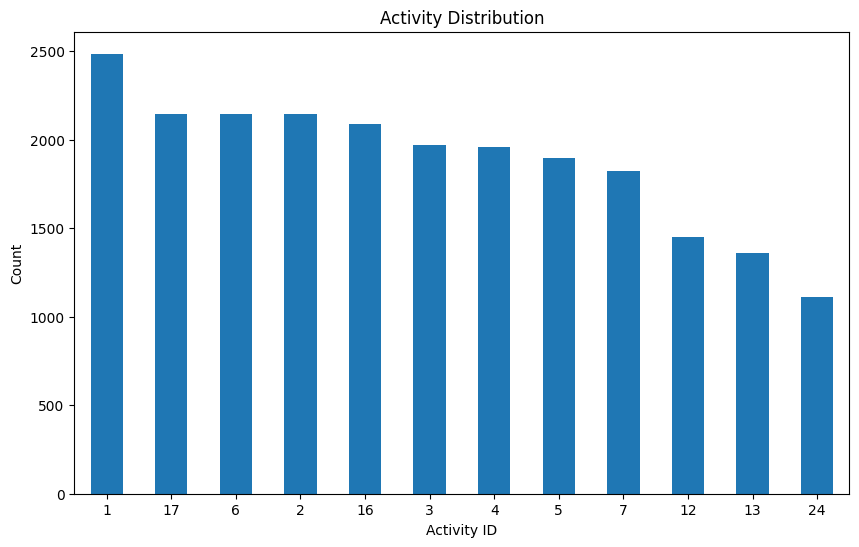

In [7]:
import matplotlib.pyplot as plt

# Distribution of activity IDs
activity_counts = filtered_data["activity_id"].value_counts()

# Plot
plt.figure(figsize=(10, 6))
activity_counts.plot(kind='bar')
plt.title("Activity Distribution")
plt.xlabel("Activity ID")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


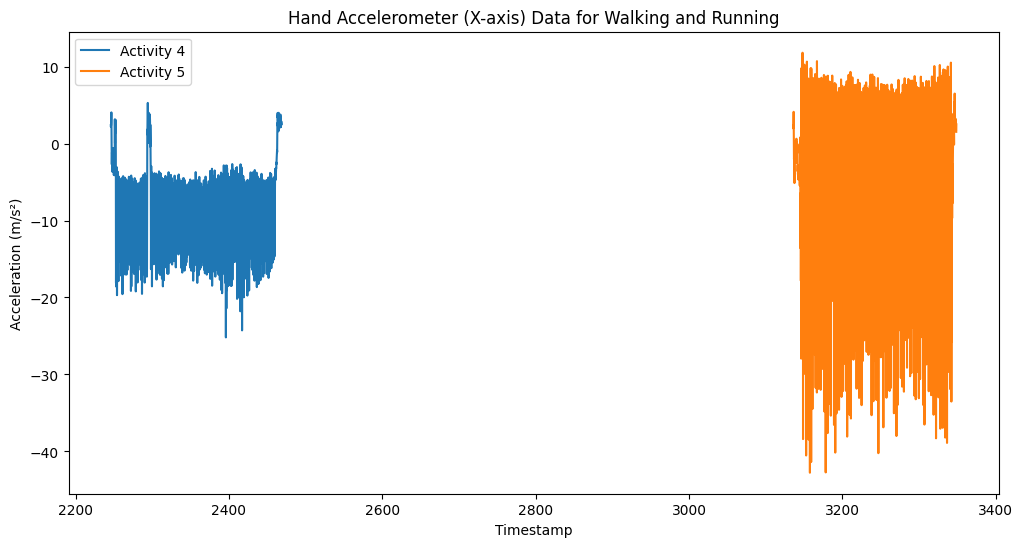

In [8]:
# Filter data for specific activities (e.g., walking and running)
activity_subset = filtered_data[filtered_data["activity_id"].isin([4, 5])]

# Plot accelerometer data for the hand
plt.figure(figsize=(12, 6))
for activity_id in [4, 5]:
    subset = activity_subset[activity_subset["activity_id"] == activity_id]
    plt.plot(subset["timestamp"], subset["hand_acc1_x"], label=f"Activity {activity_id}")

plt.title("Hand Accelerometer (X-axis) Data for Walking and Running")
plt.xlabel("Timestamp")
plt.ylabel("Acceleration (m/s²)")
plt.legend()
plt.show()


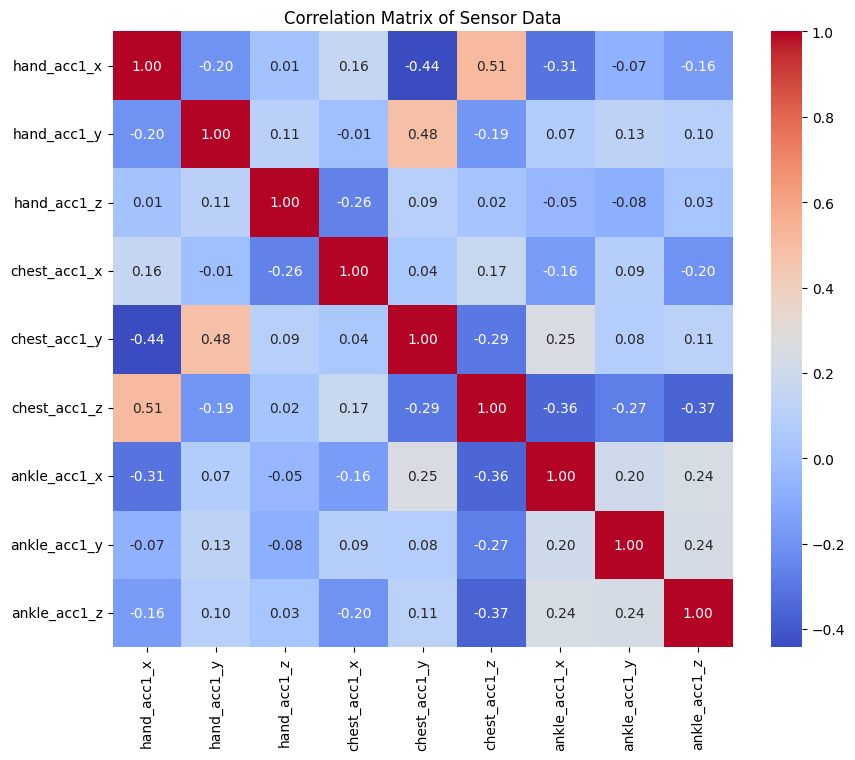

In [9]:
# Select relevant columns for correlation
sensor_data = filtered_data[[
    "hand_acc1_x", "hand_acc1_y", "hand_acc1_z",
    "chest_acc1_x", "chest_acc1_y", "chest_acc1_z",
    "ankle_acc1_x", "ankle_acc1_y", "ankle_acc1_z"
]]

# Correlation matrix
correlation_matrix = sensor_data.corr()

# Heatmap
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Sensor Data")
plt.show()

In [14]:
import os
import pandas as pd

# Directory containing all .dat files
data_dir = '/content/drive/MyDrive/HAR Balaji/PAMAP2_Dataset/Protocol'

# Initialize an empty DataFrame to store combined data
combined_data = pd.DataFrame()

# Loop through each file in the directory
for file_name in os.listdir(data_dir):
    if file_name.endswith('.dat'):  # Process only .dat files
        file_path = os.path.join(data_dir, file_name)

        # Load the .dat file
        temp_data = pd.read_csv(file_path, sep=' ', header=None, names=columns)

        # Append to the combined DataFrame
        combined_data = pd.concat([combined_data, temp_data], ignore_index=True)

# Display combined dataset information
print("Total Combined Data Shape:", combined_data.shape)
print(combined_data.info())

Total Combined Data Shape: (2872533, 54)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2872533 entries, 0 to 2872532
Data columns (total 54 columns):
 #   Column               Dtype  
---  ------               -----  
 0   timestamp            float64
 1   activity_id          int64  
 2   heart_rate           float64
 3   hand_temp            float64
 4   hand_acc1_x          float64
 5   hand_acc1_y          float64
 6   hand_acc1_z          float64
 7   hand_acc2_x          float64
 8   hand_acc2_y          float64
 9   hand_acc2_z          float64
 10  hand_gyro_x          float64
 11  hand_gyro_y          float64
 12  hand_gyro_z          float64
 13  hand_mag_x           float64
 14  hand_mag_y           float64
 15  hand_mag_z           float64
 16  hand_orientation_1   float64
 17  hand_orientation_2   float64
 18  hand_orientation_3   float64
 19  hand_orientation_4   float64
 20  chest_temp           float64
 21  chest_acc1_x         float64
 22  chest_acc1_y         floa

In [15]:
# Check for missing data
print("Missing values per column:")
print(combined_data.isnull().sum())

# Drop rows with NaN values
cleaned_data = combined_data.dropna()

# Verify the cleaned data
print(f"Shape after dropping missing values: {cleaned_data.shape}")


Missing values per column:
timestamp                    0
activity_id                  0
heart_rate             2610265
hand_temp                13141
hand_acc1_x              13141
hand_acc1_y              13141
hand_acc1_z              13141
hand_acc2_x              13141
hand_acc2_y              13141
hand_acc2_z              13141
hand_gyro_x              13141
hand_gyro_y              13141
hand_gyro_z              13141
hand_mag_x               13141
hand_mag_y               13141
hand_mag_z               13141
hand_orientation_1       13141
hand_orientation_2       13141
hand_orientation_3       13141
hand_orientation_4       13141
chest_temp                3563
chest_acc1_x              3563
chest_acc1_y              3563
chest_acc1_z              3563
chest_acc2_x              3563
chest_acc2_y              3563
chest_acc2_z              3563
chest_gyro_x              3563
chest_gyro_y              3563
chest_gyro_z              3563
chest_mag_x               3563
chest_mag_y 

In [16]:
# Exclude transient activities
cleaned_data = cleaned_data[cleaned_data["activity_id"] != 0]

# Verify the filtered data
print(f"Shape after removing transient activities: {cleaned_data.shape}")


Shape after removing transient activities: (175498, 54)


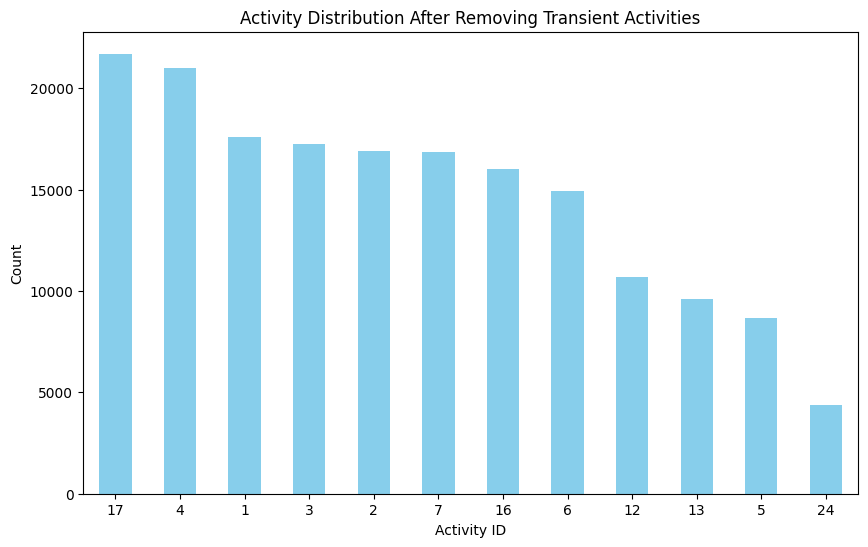

In [17]:
# Activity distribution after filtering
activity_counts = cleaned_data["activity_id"].value_counts()

# Plot activity distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
activity_counts.plot(kind='bar', color='skyblue')
plt.title("Activity Distribution After Removing Transient Activities")
plt.xlabel("Activity ID")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

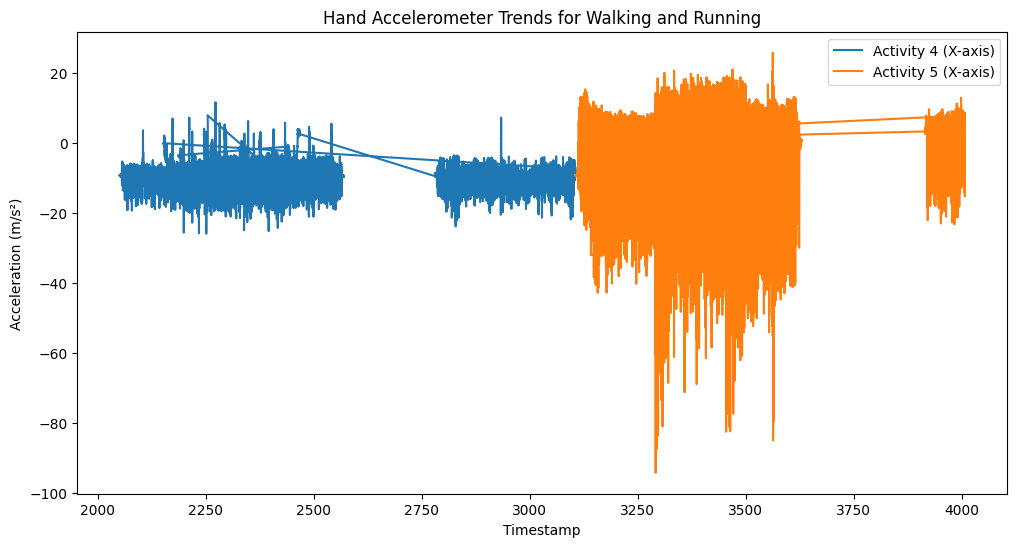

In [18]:
# Filter for specific activities (e.g., walking and running)
key_activities = cleaned_data[cleaned_data["activity_id"].isin([4, 5])]

# Plot accelerometer data trends
plt.figure(figsize=(12, 6))
for activity_id in [4, 5]:
    subset = key_activities[key_activities["activity_id"] == activity_id]
    plt.plot(subset["timestamp"], subset["hand_acc1_x"], label=f"Activity {activity_id} (X-axis)")

plt.title("Hand Accelerometer Trends for Walking and Running")
plt.xlabel("Timestamp")
plt.ylabel("Acceleration (m/s²)")
plt.legend()
plt.show()

In [19]:
# Summary statistics by activity
sensor_summary = cleaned_data.groupby("activity_id")[[
    "hand_acc1_x", "hand_acc1_y", "hand_acc1_z"
]].agg(['mean', 'std', 'min', 'max'])

# Flatten multi-index columns for readability
sensor_summary.columns = ['_'.join(col) for col in sensor_summary.columns]
print(sensor_summary)


             hand_acc1_x_mean  hand_acc1_x_std  hand_acc1_x_min  \
activity_id                                                       
1                    3.670616         4.063472         -19.9797   
2                   -1.379753         2.884227         -18.7583   
3                   -7.082347         3.873104         -18.8911   
4                  -10.085077         3.376594         -25.8954   
5                   -6.881030        13.077820         -94.1359   
6                   -5.160804         4.307872         -75.8781   
7                   -4.681095         4.887586         -43.9102   
12                  -8.731194         4.453900         -41.8381   
13                  -6.275302         5.562820         -36.1380   
16                  -7.169658         4.199008         -36.7324   
17                  -3.380207         3.259784         -26.2966   
24                  -4.101331         7.701460         -56.2879   

             hand_acc1_x_max  hand_acc1_y_mean  hand_acc1_y_s